# Project D

In [12]:
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn import cluster
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

In [13]:
#import cleaned dataset from last project - https://github.com/SarahNadeau/datascience-projectB/blob/master/cleaned.csv
data = pd.DataFrame.from_csv('cleaned.csv')
encoded_data = pd.DataFrame.from_csv('cleaned.csv')

# print(data.head(10))

# convert non-numerical to categorical integer values
for col in data.columns:
    if data[col].dtype != 'float64' and data[col].dtype != 'int64':  
        enc = LabelEncoder()
        encoded_data[col] = enc.fit_transform(encoded_data[col])
        encoded_data[col] = enc.fit_transform(encoded_data[col])
        
# print(encoded_data.head(10))

# scale features using StandardScaler
scaled_data = StandardScaler().fit_transform(encoded_data)

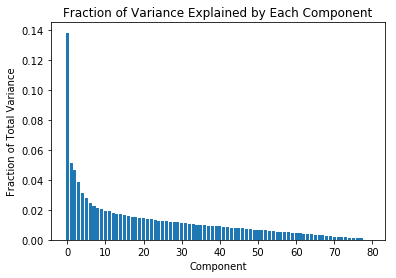

In [14]:
# perform PCA using encoded, scaled data
pca = PCA().fit(scaled_data)

# plot fraction of variance explained by each component
var = pca.explained_variance_ratio_
x = np.arange(len(var))
plt.bar(x, var)
plt.title('Fraction of Variance Explained by Each Component')
plt.xlabel('Component')
plt.ylabel('Fraction of Total Variance')
plt.show()

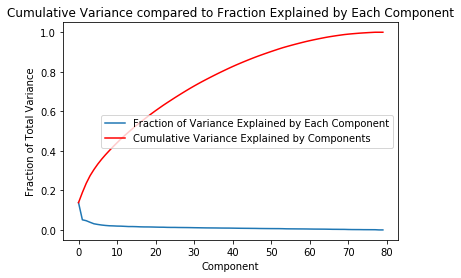

In [15]:
# include cumulative variance explained by components in plot

# get vector of cumulative variance explained for each component
cumulative_var = np.zeros(len(pca.explained_variance_ratio_))
var_explained = 0
for i,j in zip(pca.explained_variance_ratio_, range(0, len(cumulative_var))):
    var_explained += i
    cumulative_var[j] = var_explained
    
# plot
individual, = plt.plot(var, label='Fraction of Variance Explained by Each Component')
cumulative, = plt.plot(cumulative_var, color='r', label='Cumulative Variance Explained by Components')
plt.xlabel('Component')
plt.title('Cumulative Variance compared to Fraction Explained by Each Component')
plt.ylabel('Fraction of Total Variance')
plt.legend(handles = [individual, cumulative])
plt.show()

Realizing that many of the components explain a very low proportion of the dataset's overall variance, I limit the number of components. 

In [16]:
# perform PCA to find fewer components
n_comp = 5
pca = PCA(n_components=n_comp).fit(scaled_data)

In [17]:
print("{:2.2f}% of total variance is explained by {} components".format(sum(pca.explained_variance_ratio_)*100, n_comp))

30.53% of total variance is explained by 5 components


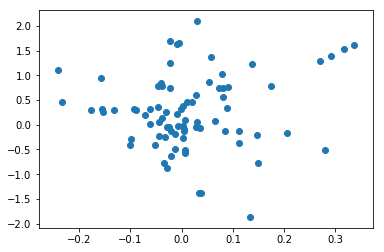

In [18]:
# what features correspond to those 5 components? Which features are correlated?
# each component in components_ is a unit vector ?? see: http://astrostatistics.psu.edu/su09/lecturenotes/pca.html

x = pca.components_[1]
y = scaled_data[4]
plt.scatter(x,y)
plt.show()

# K means Model


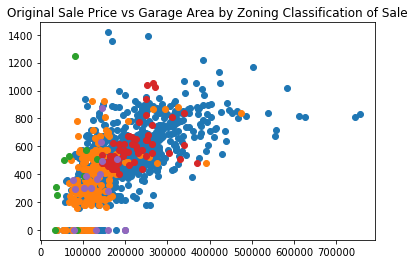

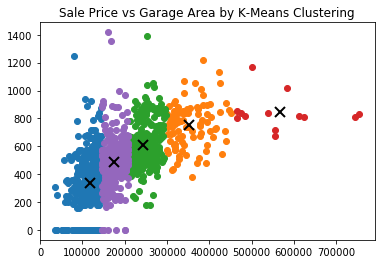

In [19]:
data = pd.read_csv('cleaned.csv')
data1 = data[['MSZoning','SalePrice','GarageArea']]       

k = len(data1['MSZoning'].unique())
for i in data1['MSZoning'].unique():
    # select only the applicable rows
    ds = data1[data1['MSZoning'] == i]
    # plot the points
    plt.plot(ds[['SalePrice']],ds[['GarageArea']],'o')
plt.title("Original Sale Price vs Garage Area by Zoning Classification of Sale")
plt.show()

del data1['MSZoning']
#increase accuracy 
kmeans = cluster.KMeans(n_clusters=k, n_init=50, max_iter=5000, algorithm='auto')
kmeans.fit(data1)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

for i in range(k):
    # select only data observations from the applicable cluster
    yr = data1.iloc[np.where(labels==i)]
    # plot the data observations
    plt.plot(yr['SalePrice'],yr['GarageArea'],'o')
    # plot the centroids
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    # make the centroid x's bigger
    plt.setp(lines,ms=10.0)
    plt.setp(lines,mew=2.0)
plt.title("Sale Price vs Garage Area by K-Means Clustering")
plt.show()

# Hierarchical Clustering

In [20]:
#import cleaned dataset from last project - https://github.com/SarahNadeau/datascience-projectB/blob/master/cleaned.csv
data = pd.DataFrame.from_csv('cleaned.csv')


In [21]:
#import cleaned dataset from last project
data = pd.DataFrame.from_csv('cleaned.csv')

BsmtQual = data['BsmtQual']
encodings = {'Ex': 6, 'Gd': 5, 'TA': 4, 'Fa': 3, 'Po': 2, 'NP' :1}
for key in encodings:
    BsmtQual = BsmtQual.replace(key, encodings[key])
data['BsmtQual'] = BsmtQual
    
ExterQual = data['ExterQual']
encodings = {'Ex': 6, 'Gd': 5, 'TA': 4, 'Fa': 3, 'Po': 2, 'NP' :1}
for key in encodings:
    ExterQual = ExterQual.replace(key, encodings[key])
data['ExterQual'] = ExterQual
    
ExterCond = data['ExterCond']
encodings = {'Ex': 6, 'Gd': 5, 'TA': 4, 'Fa': 3, 'Po': 2, 'NP' :1}
for key in encodings:
    ExterCond = ExterCond.replace(key, encodings[key])
data['ExterCond'] = ExterCond
    
BsmtCond = data['BsmtCond']
encodings = {'Ex': 6, 'Gd': 5, 'TA': 4, 'Fa': 3, 'Po': 2, 'NP' :1}
for key in encodings:
    BsmtCond = BsmtCond.replace(key, encodings[key])
data['BsmtCond'] = BsmtCond
    
KitchenQual = data['KitchenQual']
encodings = {'Ex': 6, 'Gd': 5, 'TA': 4, 'Fa': 3, 'Po': 2, 'NP' :1}
for key in encodings:
    KitchenQual = KitchenQual.replace(key, encodings[key])
data['KitchenQual'] = KitchenQual
    
GarageQual = data['GarageQual']
encodings = {'Ex': 6, 'Gd': 5, 'TA': 4, 'Fa': 3, 'Po': 2, 'NP' :1}
for key in encodings:
    GarageQual = GarageQual.replace(key, encodings[key])
data['GarageQual'] = GarageQual

encoded = ['BsmtQual', 'ExterQual', 'ExterCond', 'BsmtCond', 'KitchenQual', 'GarageQual']

In [22]:
data = pd.DataFrame(data, columns = encoded)
# scale features using StandardScaler
data = StandardScaler().fit_transform(data)

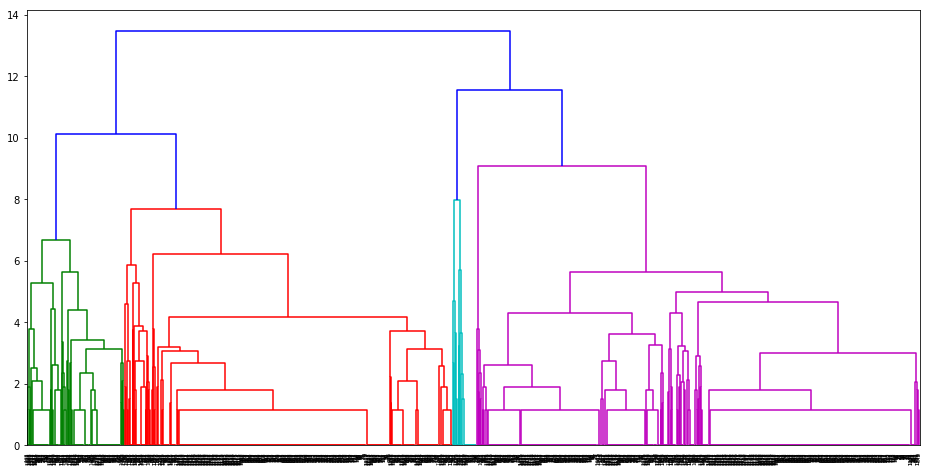

In [23]:
hclust = linkage(data, 'complete')

# plot dendrogram
# increases figure size
plt.figure(figsize=(16, 8))
dendrogram(hclust)
plt.show()